# 单元2
## 网络爬虫引发的问题
### 网络爬虫尺寸
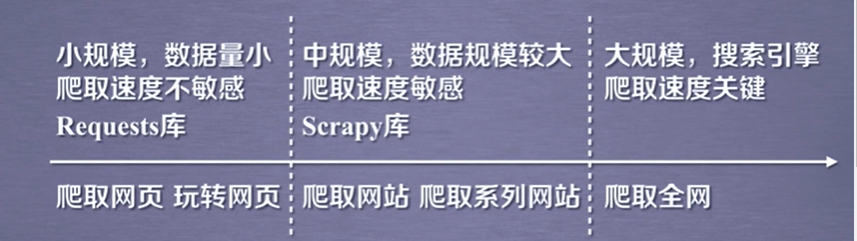
### 网络爬虫的骚扰
受限于编写水平与目的，网络爬虫将会为web服务器带来巨大的资源开销，因为爬虫会以远高于人类访问速度的次数来访问，服务器可能收不了
### 网络爬虫的限制
- 来源审查：判断User-Agent进行限制  
检查来访HTTP协议头的User-Agent域，只响应浏览器或友好爬虫的访问。
- 发布公告：Robots协议  
告知所有爬虫网站的爬取策略，要求爬虫遵守。

## Robots协议
Robots Exclusion Standard网络爬虫排除标准
告诉网站那些可以爬取，那些不行，是一种在网站根目录下的robots.txt文件。

## 单元3Requests库网络爬虫实例
### 爬取京东商品

In [6]:
import requests
r = requests.get("https://item.jd.com/100018725930.html")
r.status_code

200

In [15]:

r.encoding = 'UTF-8'

In [16]:
r.text[:1000]

"<script>window.location.href='https://passport.jd.com/new/login.aspx?ReturnUrl=http%3A%2F%2Fitem.jd.com%2F100018725930.html'</script>"

In [18]:
r.encoding

'UTF-8'

In [22]:
r = requests.get('https://www.amazon.cn/dp/B00C69DC4E/ref=sr_1_1?__mk_zh_CN=%E4%BA%9A%E9%A9%AC%E9%80%8A%E7%BD%91%E7%AB%99&dchild=1&keywords=%E5%AE%8F%E7%A2%81s3&qid=1631524199&sr=8-1')
r.status_code

200

In [23]:
r.encoding

'UTF-8'

In [26]:
r.text[:1000]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\n\n\n\n\n\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    <!doctype html><html class="a-no-js" data-19ax5a9jf="dingo">\n    <head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8">\n\n    \n\n\n\n    <link rel="dns-prefetch" href="//images-cn.ssl-images-amazon.com">\n\n\n\n  \n\n\n\n\n    \n\n\n\n\n\n\n\n\n\n\n\n  \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n        \n        \n        \n\n  \n\n\n\n\n\n\n\n\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!--  -->\n<link rel="stylesheet" href="https://images-cn.ssl-images-amazon.cn/images/I/21taIyvn9cL._RC|71371s-L7PL.css,31ZjzeSAHqL.css,31xhifYM3YL.css,211OZH86tdL.css,41um

In [27]:
r.request.headers

{'User-Agent': 'python-requests/2.25.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

### 百度360搜索关键词提交

In [1]:
import requests
kv = {'wd':'Python'}  #创立一个键值对
r = requests.get("https://www.baidu.com/s",params=kv)  #通过Params将键值对输入进去
r.status_code

200

In [2]:
r.request.url

'https://www.baidu.com/s?wd=Python'

In [3]:
len(r.text)

227

In [4]:
r.text

'<html>\r\n<head>\r\n\t<script>\r\n\t\tlocation.replace(location.href.replace("https://","http://"));\r\n\t</script>\r\n</head>\r\n<body>\r\n\t<noscript><meta http-equiv="refresh" content="0;url=http://www.baidu.com/"></noscript>\r\n</body>\r\n</html>'

In [5]:
#全代码
import requests
keyword = "Python"
try:
    kv = {'wd':keyword}
    r = requests.get('https://www.baidu.com/s',params=kv)
    print(r.request.url)
    r.raise_for_status()
    print(len((r.text)))
except:
    print("爬取失败")

https://www.baidu.com/s?wd=Python
227


### 网络图片爬取和存储

In [6]:
import requests
path = "D:/abc.jpg"
url = "http://img0.dili360.com/pic/2021/01/15/60010e2692ab69g26671088_t.jpg@!rw9"
r = requests.get(url)
r.status_code

200

In [8]:
with open(path,'wb') as f:  #将二进制写入文件中
    f.write(r.content)
    
    f.close()

In [9]:
#图片爬取全代码
import requests
import os
url = "http://img0.dili360.com/pic/2021/01/15/60010e2692ab69g26671088_t.jpg@!rw9"
root = "D://pics//"
path = root + url.split('/')[-1]
try:
    if not os.path.exists(root):
        os.mkdir(root)
    if not os.path.exists(path):
        r = requests.get(url)
        with open(path,'wb') as f:
            f.write(r.content)
            f.close()
            print("文件已保存")
    else:
        print("文件已存在")
except:
    print("爬取失败")

文件已保存


### IP地址归属地的自动查询

In [17]:
import requests
url = "https://www.ip138.com/iplookup.asp?ip=101.28.81.145&action=2"
r = requests.get(url)
r.status_code

404